<a href="https://colab.research.google.com/github/DomMc97/Citation-Graph-Clustering/blob/main/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Clustering of Feature Matrix

An unsupervised clustering, using k-means clustering, of a dataset of a collection of text documents. Each sample in the dataset corresponds to a journal paper in some scientific discipline. The text in each paper has been summarised as a high-dimensional vector of p features, where each (binary) coordinate of the vector indicates the presence or absence of a particular word within the text of the paper. The size of the dictionary for this dataset is $1433$ words.

The dataset contains $N=2485$ papers, and each paper is described by a p-dimensional vector of features ($p=1433$). This dataset is given as an $N \times p$ feature matrix, $F$.


---




## Set up

In [1]:
# scientific library
import numpy as np

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.cluster import KMeans
from sklearn import metrics


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets design of figures

# libraries for saving/loading data
import pickle
from google.colab import drive

Mount Google Drive 

In [2]:
# mount drive
drive.mount('/content/drive')

# root of all file paths used in notebook
root = '/content/drive/My Drive/Methods for Data Science/CW3/Data/'

Mounted at /content/drive


Asks user whether this is the first run of the code to avoid repeat computations.

In [3]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
n


Importation of the feature matrix.

In [4]:
# upload feature matrix
F = pd.read_csv(root + 'feature_matrix.csv', header=None)

# checks shape of F
print('Feature Matrix Shape is', F.shape)

Feature Matrix Shape is (2485, 1433)


## Overview of K-means Clustering

<u>Unsupervised Clustering</u>

Given a dataset $\{{\vec{x}^{(i)}}\}^{N}_{i=1}$  and a dissimilarity measure $D(\vec{x}^{(i)},\vec{x}^{(j)})$ the objective of unsupervised clustering is to find a partition of the N samples into K clusters $\{C\}^{K}_{l=1}$ such that the dissimilarity is smaller within the cluster than across clusters.

<u>K-means</u>

The K-means algorithm attempts to finds a clustering for which the within cluster normalized disimilarity is minimal for the given disimilarity,

$$D(\vec{x}^{(i)},\vec{x}^{(j)}) = ||\vec{x}^{(i)}-\vec{x}^{(j)}||^2$$

It does this by initialising with a random cluster then iterates the following steps:

* **Step 1:** Compute the centroid of each of the K clusters.

$$\vec{ml} = \frac{1}{Cl}\sum_{i \in Cl}\vec{x}^{(i)}$$

* **Step 2:** Reassign each $\vec{x}^{(i)}$ to the closest centroid.


## Overview of Quality Measures

In absence of a ground truth clustering, heuristics are needed to ascertain the quality of a clustering. There are a variety of quality measures which do this I will use the Calinski-Harabasz (CH) score, the Silhouette Coefficient and the Davies-Bouldin index.

<u>Calinski-Harabasz (CH)</u>

The CH score is, $$ CH(K)=[\frac{B(K)}{W(K)}][\frac{N-K}{K−1}]$$
 
where $W(k)$ is the within cluster normalized disimilarity and $B(k)$ is the between cluster normalized disimilarity. It is used to evaluate the optimal number of clusters. 

A higher CH score relates to a model with better defined clusters. Since a larger $B(K)$ means the clusters have a larger distance from each other and a smaller $W(K)$ means the distance between the points in a cluster is smaller so it's a 'tighter' cluster. So the CH score maximises these two notions of a cluster being well defined.

<u>Silhouette Coefficient</u>

The silhouette value is a measure of how similar a datapoint is to its own cluster compared to it's similarity to other clusters. The silhouette value ranges from −1 to +1, where a high value indicates that the object is similar to its own cluster and disimilar to neighboring clusters. The silhoutte coefficient is a mean of these values.

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b-a}{\max(a, b)} $$

where,


*   **a:** The mean distance between a sample and all other points in the same class.
*   **b:** The mean distance between a sample and all other points in the next nearest cluster.

<u>Davies-Bouldin Index</u>

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

0 is the lowest possible score, values closer to 0 indicate a better defined clustering.

For a similarity measure $R_{ij}$ defined as:

$$R_{ij} = \frac{s_{i} + s_{j}}{d_{ij}}$$

where,


*  $s_{i}$: The average distance between each point of cluster  and the centroid of that cluster.

*  $d_{ij}$: The distance between cluster centroids and $i$ and $j$.

Then the Davies-Bouldin index is defined as:

$$ DB = \frac{1}{k}\sum_{i=1}^{k} max_{i \neq j}R_{ij}$$



## K-means Clustering

I aim to find an optimised clustering of the feature matrix F by running the K-means algorithm for all values of K in the interval [2, 30] I will then compute each 'optimal' clusters Calinski-Harabasz (CH) score Silhouette Coefficient and Davies-Bouldin index .


In [5]:
%%time
#sets a range for K
K = range(2,31)

# if initial run find results
if init_run:
    # CH scores for different k
    CH_scores = []
    # Silhoutte scores
    S_scores = []
    # Davies-Bouldin index scores
    DB_scores = []

    for k in K:
        # runs k means algorithm
        kmeans_model = KMeans(n_clusters=k, random_state=0).fit(F)
      
        # finds CH score
        labels = kmeans_model.labels_
        CH_scores.append(metrics.calinski_harabasz_score(F, labels))
      
        # finds Silhouette score
        S_scores.append(metrics.silhouette_score(F, labels, metric='euclidean'))
      
        # finds DB score
        DB_scores.append(metrics.davies_bouldin_score(F, labels))
    
    # save results
    with open(root + 'CH_scores.txt', 'wb') as fp:
        pickle.dump(CH_scores, fp)
    
    with open(root + 'S_scores.txt', 'wb') as fp:
        pickle.dump(S_scores, fp)
    
    with open(root + 'DB_scores.txt', 'wb') as fp:
        pickle.dump(DB_scores, fp)

# else load results
else:
    CH_scores = pickle.load(open(root + 'CH_scores.txt', 'rb'))
    S_scores = pickle.load(open(root + 'S_scores.txt', 'rb'))
    DB_scores = pickle.load(open(root + 'DB_scores.txt', 'rb'))

CPU times: user 582 µs, sys: 2.16 ms, total: 2.74 ms
Wall time: 1.3 s


Plot of the CH score to evaluate
the quality of the clusterings as a function of k, and pick the first clustering with $CH < 7$ as the 'optimal' clustering. 

Optimal K with a CH Score of  6.89748 .


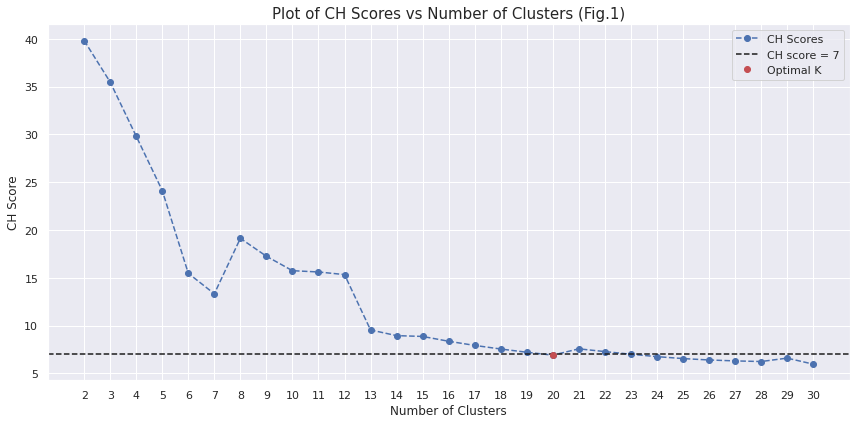

In [6]:
# creates figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.xticks(K)

# creates titles
ax.set_title('Plot of CH Scores vs Number of Clusters (Fig.1)', fontsize=15)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('CH Score')

#  makes plot 
plt.plot(K, CH_scores, linestyle='dashed', marker='o', label= 'CH Scores')
plt.axhline(7, color='k',linestyle='dashed',label='CH score = 7')

# finds plots optimum point
index = np.where(np.array(CH_scores) < 7)[0][0]
opt = [K[index], CH_scores[index]]

label = 'Optimal K'
plt.plot(opt[0], opt[1], marker='o',color='r',linestyle='None', label=label)
plt.legend()

# prints findings
print(label, 'with a CH Score of ', str.format('{0:0.5f}', opt[1]), '.')
plt.tight_layout()
plt.show()

## Characteristics of Optimum Cluster

I'll now report the characteristics of this 'optimal' clustering size of $K=20$.

In [7]:
# runs k means algorithm
kmeans_model = KMeans(n_clusters=opt[0], random_state=0).fit(F)

# finds clustering
labels = kmeans_model.labels_

# save results
with open(root + 'labels.sav', 'wb') as fp:
    pickle.dump(labels, fp)

Firstly I'll report the distribution of cluster sizes.

#######################
Cluster size statistics
#######################

Mean: 124.25
Max: 753
Min: 1
Standard Deviation: 225.85


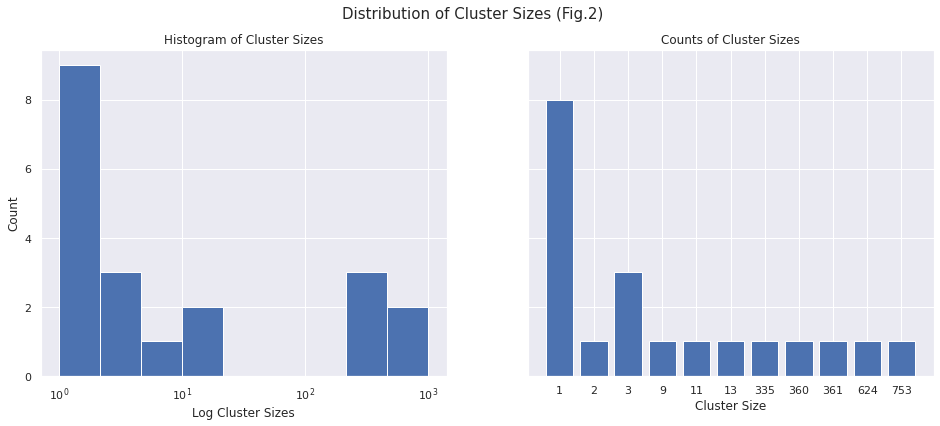

In [8]:
# sizes of clusters
(_, counts) = np.unique(labels, return_counts=True)

# counts of sizes of clusters
(sizes, size_counts) = np.unique(counts, return_counts=True)

# cluster size statistics
print('#######################')
print('Cluster size statistics')
print('#######################\n')
km_mean = counts.mean()
km_max = counts.max()
km_min = counts.min()
km_std = counts.std()
print('Mean:', km_mean)
print('Max:', km_max)
print('Min:', km_min)
print('Standard Deviation: %.2f' %km_std)

# create axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# creates titles
fig.suptitle('Distribution of Cluster Sizes (Fig.2)',fontsize='15')
ax1.set_title('Histogram of Cluster Sizes')
ax1.set_xlabel('Log Cluster Sizes')
ax1.set_ylabel('Count')
ax2.set_title('Counts of Cluster Sizes')
ax2.set_xlabel('Cluster Size')

# histogram
logbins = np.logspace(0, 3, 10)
ax1.hist(counts,bins=logbins)
ax1.set_xscale('log')

# count plot
x_pos = np.arange(0,len(sizes))
ax2.bar(x_pos, size_counts)
plt.xticks(x_pos, sizes)

plt.show()

We can see that the majority (75%) of the 20 clusters are small clusters containing less than 13 documents. There is then a large gap in size for the remaining clusters which are all 10-100 times bigger than the small set. This can be interpreted as the feature space having 5 strong groups of similarity with the remaing clusters being groups which fit inbetween cores. For example how we;d expect Applied Mathematics to sit between Physics, Computer Science, Biology and Mathematics. 


---


Now I'll report within group $W(K)$ and
across group similarities $B(K)$.

**Note:** Since we have already computed $K, N, CH(K)$ I'll calculate $B(K)$ as $B(K) = CH(K)W(K)\frac{K-1}{N-K}$.

In [9]:
# calculates W(K) and B(K)
W = kmeans_model.inertia_
CH = opt[1]
N = 2485
k = opt[0]
B = CH*W*((k-1)/(N-k)) 

# prints results
print('#######################')
print('Cluster similarities')
print('#######################\n')
print('The within cluster normalized disimilarity is %.2f.' %W)
print('The between cluster normalized disimilarity is %.2f.\n' %B)

#######################
Cluster similarities
#######################

The within cluster normalized disimilarity is 40627.08.
The between cluster normalized disimilarity is 2159.94.



I'll now evaluate the quality of the 'optimal' clustering I found according to the CH score (discussed above) and the other quality measures Silhouette Coefficient and the Davies-Bouldin index.

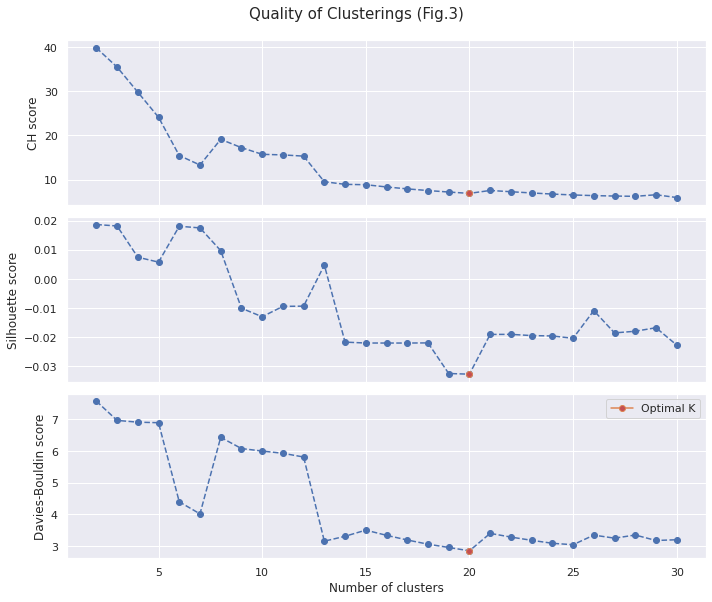

In [10]:
# creates axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,8))

# creates titles
fig.suptitle('Quality of Clusterings (Fig.3)', fontsize='15',y=1.04)
ax3.set_xlabel('Number of clusters')
ax1.set_ylabel('CH score')
ax2.set_ylabel('Silhouette score')
ax3.set_ylabel('Davies-Bouldin score')

#  makes plot of CH
ax1.plot(K, CH_scores, linestyle='dashed', marker='o')

#  makes plot of SS
ax2.plot(K, S_scores, linestyle='dashed', marker='o')

#  makes plot of DB
ax3.plot(K, DB_scores, linestyle='dashed', marker='o')

# annotate 'optimum' cluster 
label = 'Optimal K'
i = opt[0] - 2
ax1.plot(opt[0], opt[1], marker='o',markerfacecolor='r')
ax2.plot(opt[0], S_scores[i], marker='o',markerfacecolor='r')
ax3.plot(opt[0], DB_scores[i], marker='o',markerfacecolor='r',label=label)

ax3.legend()
plt.tight_layout()
plt.show()

From (Fig.3) we can see that our 'optimal' clustering performs well for the Davies-Bouldin score with a low score compared to other values of K tested.

However we see a negative score for the Silhouette score which normally suggests we have too many or too few clusters (in our case from the plot it would suggest we have too many). The CH score is also a lot higher and hence better for smaller clusters.

Therefore overall we have an okay quality cluster which performs well for some metrics but not for others. From inspection of (Fig.3) a clustering of size K of around 13 seems optimal if we require a well-rounded clustering which performs well for all the tested metrics.

## Robustness of Results

To evaluate the robustness of my results to the random initilisations I'll run the k-means for 10 random states and see the consistency in the choice of 'optimal' K.

In [17]:
%%time
# if initial run find results
if init_run:
    #sets a range for K
    K = range(2,31)

    # states
    states = np.arange(0, 10)

    #list of CH scores
    CH_lst = []
    # list of optimum cluster sizes
    K_lst = []

    for state in states:
        # CH scores for different k 
        CH_scores = []
      
        for k in K:
            # runs k means algorithm
            kmeans_model = KMeans(n_clusters=k, random_state=state).fit(F)
      
            # finds CH score
            labels = kmeans_model.labels_
            CH_scores.append(metrics.calinski_harabasz_score(F, labels))

        # finds plots optimum point
        index = np.where(np.array(CH_scores) < 7)[0][0]
        K_opt = K[index]
                  
        # adds scores to lists
        CH_lst.append(CH_scores)
        K_lst.append(K_opt)
    
    # save results
    with open(root + 'CH_lst.txt', 'wb') as fp:
        pickle.dump(CH_lst, fp)
    
    with open(root + 'K_lst.txt', 'wb') as fp:
        pickle.dump(K_lst, fp)

# else load results
else:
    CH_lst = pickle.load(open(root + 'CH_lst.txt', 'rb'))
    K_lst = pickle.load(open(root + 'K_lst.txt', 'rb'))

CPU times: user 1.32 ms, sys: 130 µs, total: 1.45 ms
Wall time: 952 ms


Plot of CH scores for the random clusters.

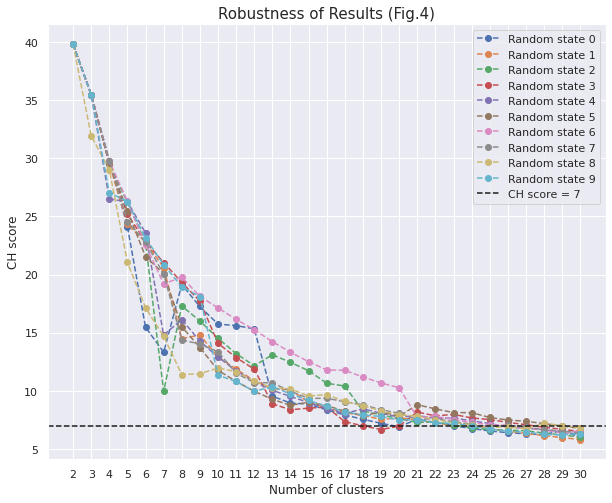

In [18]:
# creates figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.xticks(K)

# creates titles
ax.set_title('Robustness of Results (Fig.4)',fontsize='15')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('CH score')

#  makes plots
count = 0
for CH_scores in CH_lst: 
    label = 'Random state ' + str(count)
    plt.plot(K, CH_scores, linestyle='dashed', marker='o', label=label)
    count = count + 1

plt.axhline(7, color='k',linestyle='dashed',label='CH score = 7')

plt.legend()
plt.show()

Plot of the distribution of the optimum K.

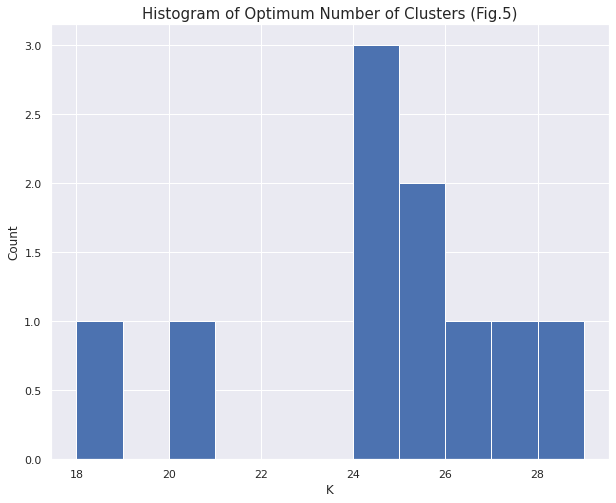

In [24]:
# creates figure
fig = plt.figure(figsize=(10,8))

# makes plots
plt.hist(K_lst,bins=11)

# sets title
plt.title('Histogram of Optimum Number of Clusters (Fig.5)', fontsize='15')
plt.xlabel('K')
plt.ylabel('Count')
plt.show()

We can see in (Fig.4) that even though each run of K-means starts at a different random clustering, after the iterations of the algorithm the final 'results' for the CH score are similar for each random state suggesting a robustness of the CH Score across random initialisations.

However (Fig.5) display a lack in robustness in the finding of the first K where the CH score is less than 7 with a wide distribution of the K to choose. The choice of K of 20 is only found for one initialisation whereas K = 24 is the modal K found across the random states. 